
# 🌦️ Phân tích & Tiền xử lý Dữ liệu Thời tiết Hà Nội
**Tác giả:** Hà  
**Mục tiêu:** Phân tích dữ liệu thời tiết (theo giờ & theo ngày) của Hà Nội, kiểm tra dữ liệu thiếu, trùng, ngoại lai, và đánh giá sơ bộ tình hình dữ liệu.

---


In [1]:

# I. IMPORT THƯ VIỆN VÀ CÀI ĐẶT CƠ BẢN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hiển thị đẹp và set style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Thư viện đã import xong.")


✅ Thư viện đã import xong.


## 📊 PHẦN 1 — PHÂN TÍCH DỮ LIỆU HÀ NỘI THEO GIỜ (`Hanoi Hourly.csv`)

In [2]:

# Đọc dữ liệu theo giờ
path_hourly = "/Users/user/Desktop/HN/Hanoi Hourly.csv"
df_hourly = pd.read_csv(path_hourly, encoding='utf-8-sig')

# Hiển thị thông tin cơ bản
print("Kích thước dữ liệu:", df_hourly.shape)
display(df_hourly.head())


Kích thước dữ liệu: (94248, 24)


,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,Hanoi,2015-01-01T00:00:00,15.0,15.0,13.0,87.84,0.0,0,NaN,0.0,0.0,11.9,3.6,270.0,1023.0,0.0,3.5,0.0,0.0,0.0,NaN,Clear,clear-night,"48820099999,VVNB"
1,Hanoi,2015-01-01T01:00:00,15.8,15.8,13.0,83.33,0.0,0,NaN,0.0,0.0,11.2,6.4,314.0,1022.6,0.0,8.5,0.0,0.0,0.0,NaN,Clear,clear-night,"48820099999,48825099999,48831099999,VVNB"
2,Hanoi,2015-01-01T02:00:00,13.5,13.5,12.0,90.65,0.0,0,NaN,0.0,0.0,11.2,3.6,90.0,1022.0,0.0,3.0,0.0,0.0,0.0,NaN,Clear,clear-night,"48820099999,VVNB"
3,Hanoi,2015-01-01T03:00:00,13.0,13.0,12.0,93.65,0.0,0,NaN,0.0,0.0,11.2,1.8,329.2,1022.0,0.0,2.0,0.0,0.0,0.0,NaN,Clear,clear-night,VVNB
4,Hanoi,2015-01-01T04:00:00,14.7,14.7,12.5,86.57,0.0,0,NaN,0.0,0.0,10.8,9.2,352.0,1022.4,0.0,8.2,0.0,0.0,0.0,NaN,Clear,clear-night,"48820099999,48825099999,VVNB"


In [3]:

# Kiểm tra kiểu dữ liệu và thống kê mô tả
df_hourly.info()
display(df_hourly.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94248 entries, 0 to 94247
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              94248 non-null  object 
 1   datetime          94248 non-null  object 
 2   temp              94248 non-null  float64
 3   feelslike         94248 non-null  float64
 4   dew               94248 non-null  float64
 5   humidity          94248 non-null  float64
 6   precip            94209 non-null  float64
 7   precipprob        94248 non-null  int64  
 8   preciptype        12055 non-null  object 
 9   snow              94206 non-null  float64
 10  snowdepth         94206 non-null  float64
 11  windgust          94199 non-null  float64
 12  windspeed         94247 non-null  float64
 13  winddir           94246 non-null  float64
 14  sealevelpressure  94248 non-null  float64
 15  cloudcover        94248 non-null  float64
 16  visibility        94070 non-null  float6

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
count,94248,94248,94248.000000,94248.000000,94248.000000,94248.000000,94209.000000,94248.000000,12055,94206.0,94206.0,94199.000000,94247.000000,94246.000000,94248.000000,94248.000000,94070.000000,94212.000000,94212.000000,94212.000000,32645.000000,94248,94248,94248
unique,1,94248,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,8,22
top,Hanoi,2015-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partially cloudy,partly-cloudy-day,"48820099999,VVNB"
freq,94248,1,NaN,NaN,NaN,NaN,NaN,NaN,12055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52574,29371,61104
mean,NaN,NaN,24.896258,27.393700,20.485905,78.270513,0.217643,8.245268,NaN,0.0,0.0,17.380778,9.318116,142.613537,1011.082052,64.712259,8.599728,155.174609,0.558068,1.545100,17.062031,NaN,NaN,NaN
std,NaN,NaN,5.613481,8.500585,5.931406,15.748502,2.647468,27.505461,NaN,0.0,0.0,7.716193,4.824510,104.672241,7.315970,34.604449,2.848757,235.708445,0.849264,2.370613,15.945075,NaN,NaN,NaN
min,NaN,NaN,5.900000,2.100000,-8.000000,17.590000,0.000000,0.000000,NaN,0.0,0.0,1.100000,0.000000,0.000000,985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,NaN,NaN,NaN
25%,NaN,NaN,21.000000,21.000000,17.000000,67.360000,0.000000,0.000000,NaN,0.0,0.0,11.500000,5.600000,65.000000,1005.000000,36.100000,7.000000,0.000000,0.000000,0.000000,10.000000,NaN,NaN,NaN
50%,NaN,NaN,25.900000,25.900000,22.400000,81.880000,0.000000,0.000000,NaN,0.0,0.0,16.600000,8.500000,115.000000,1010.900000,81.900000,10.000000,5.800000,0.000000,0.000000,10.000000,NaN,NaN,NaN
75%,NaN,NaN,29.000000,34.200000,25.000000,91.340000,0.000000,0.000000,NaN,0.0,0.0,22.000000,12.100000,185.000000,1016.800000,89.900000,10.000000,248.125000,0.900000,2.000000,15.000000,NaN,NaN,NaN


In [6]:
# Kiểm tra missing values và duplicates
print(f"Số lượng giá trị thiếu:\n{df_hourly.isnull().sum()}")
print(f"\nTỷ lệ thiếu (%):\n{(df_hourly.isnull().mean() * 100).round(2)}")

dupes = df_hourly.duplicated().sum()
print(f"\nSố dòng trùng lặp: {dupes}")


Số lượng giá trị thiếu:
name                    0
datetime                0
temp                    0
feelslike               0
dew                     0
humidity                0
precip                 39
precipprob              0
preciptype          82193
snow                   42
snowdepth              42
windgust               49
windspeed               1
winddir                 2
sealevelpressure        0
cloudcover              0
visibility            178
solarradiation         36
solarenergy            36
uvindex                36
severerisk          61603
conditions              0
icon                    0
stations                0
dtype: int64

Tỷ lệ thiếu (%):
name                 0.00
datetime             0.00
temp                 0.00
feelslike            0.00
dew                  0.00
humidity             0.00
precip               0.04
precipprob           0.00
preciptype          87.21
snow                 0.04
snowdepth            0.04
windgust             0.05
windspeed

In [7]:

# Phát hiện outliers bằng phương pháp IQR
numeric_cols = df_hourly.select_dtypes(include=[np.number]).columns

Q1 = df_hourly[numeric_cols].quantile(0.25)
Q3 = df_hourly[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_hourly[numeric_cols] < (Q1 - 1.5 * IQR)) | 
            (df_hourly[numeric_cols] > (Q3 + 1.5 * IQR))).sum()

print("Số lượng outliers (theo từng cột):\n", outliers)


Số lượng outliers (theo từng cột):
 temp                 102
feelslike              0
dew                 1312
humidity             414
precip              7771
precipprob          7771
snow                   0
snowdepth              0
windgust            1193
windspeed           1514
winddir                0
sealevelpressure      41
cloudcover             0
visibility          4689
solarradiation      7175
solarenergy         7072
uvindex             9387
severerisk          7963
dtype: int64


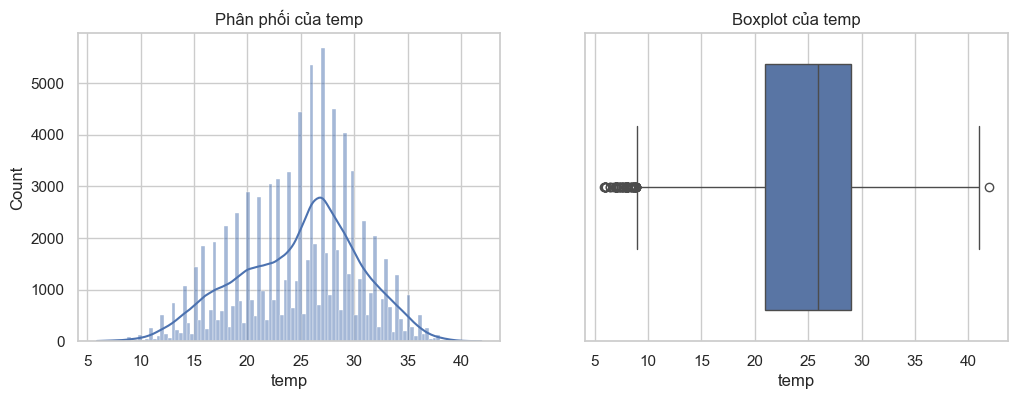

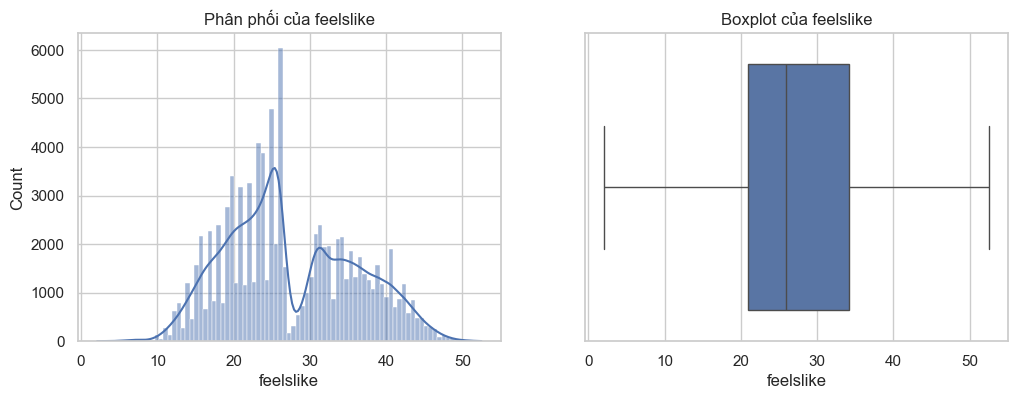

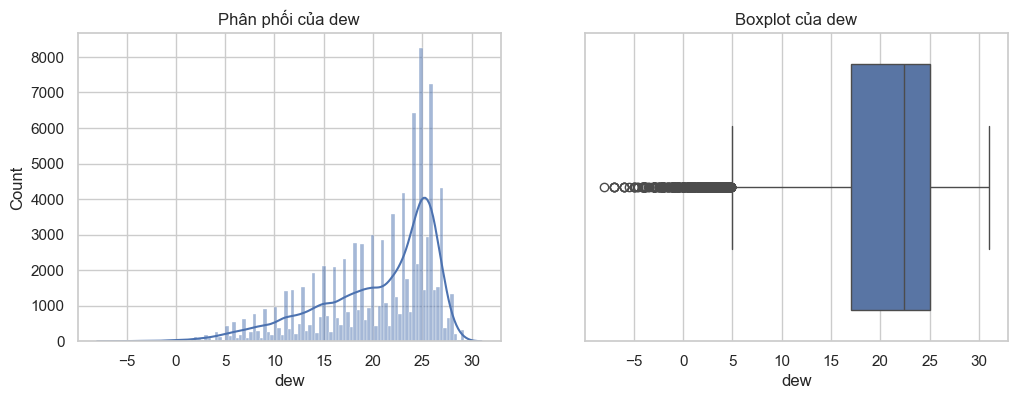

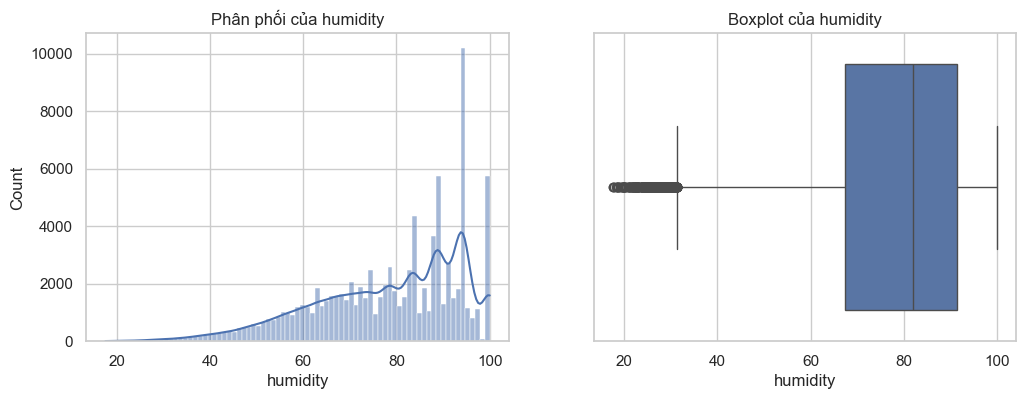

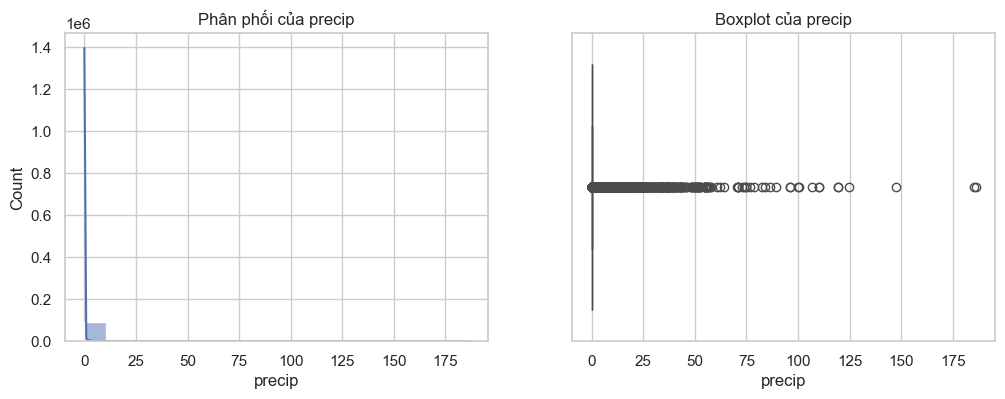

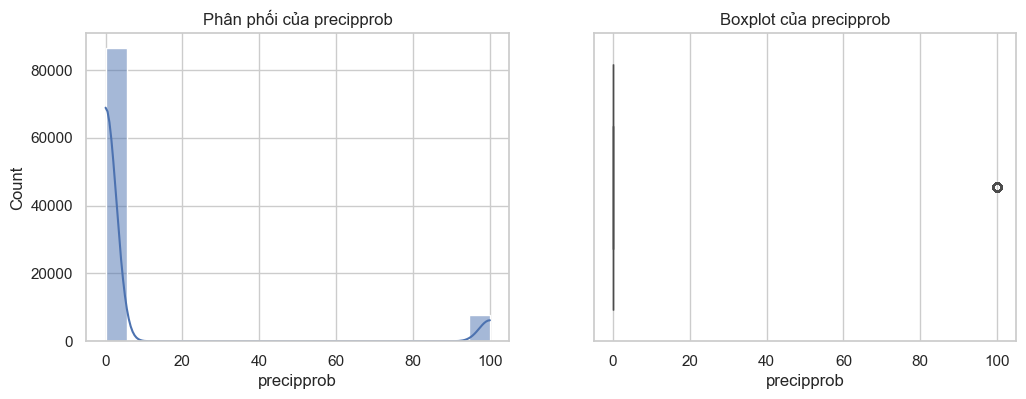

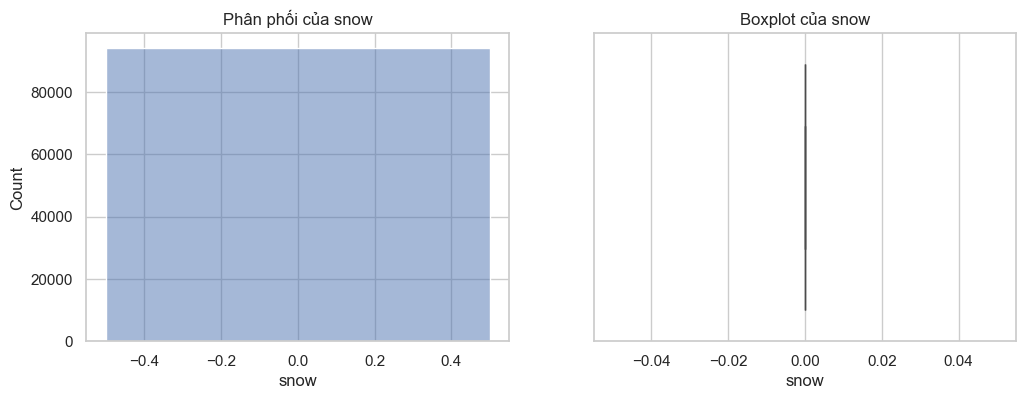

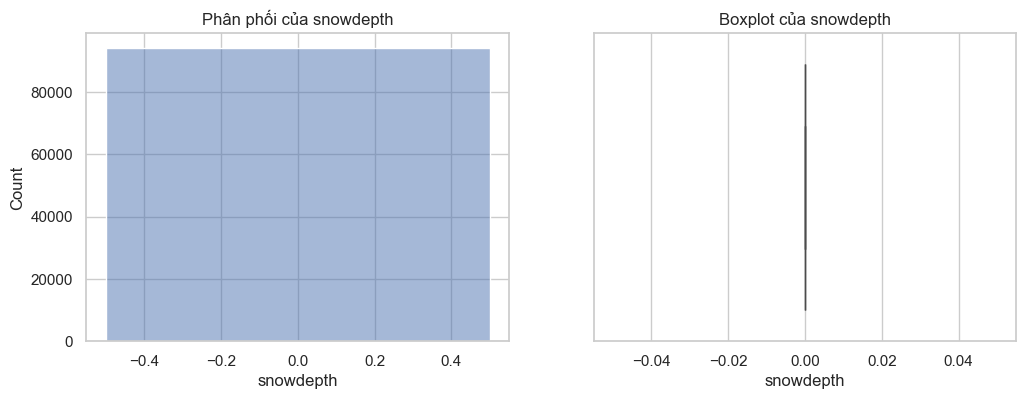

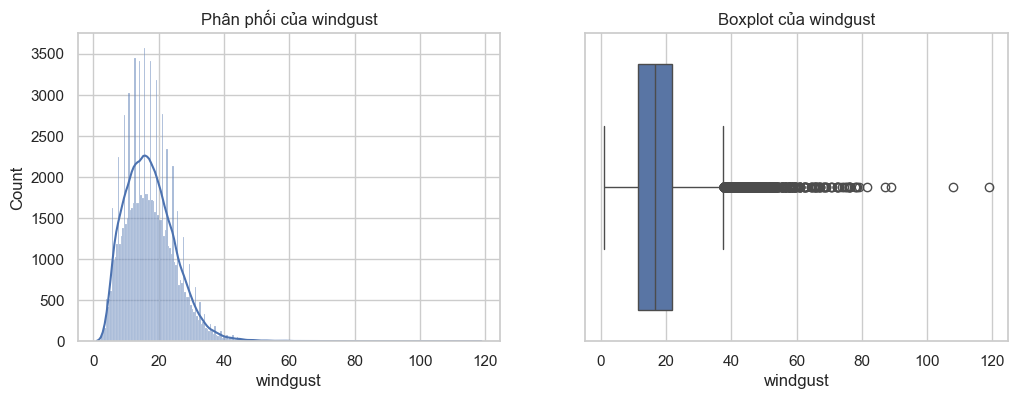

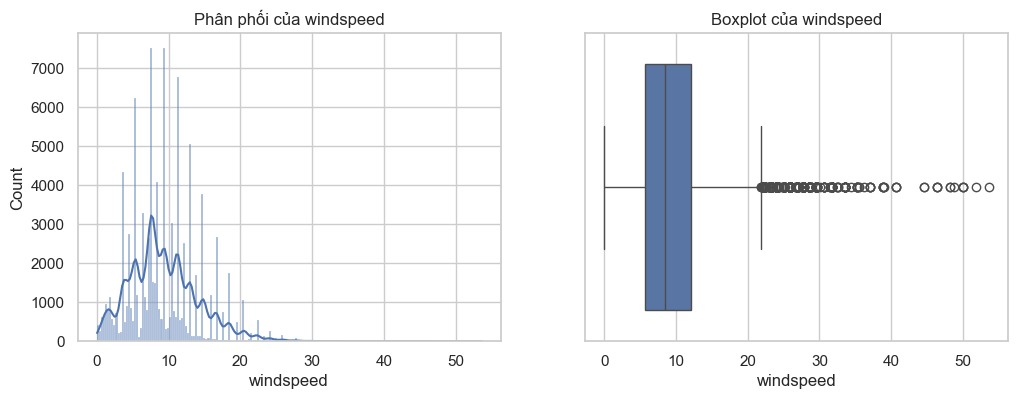

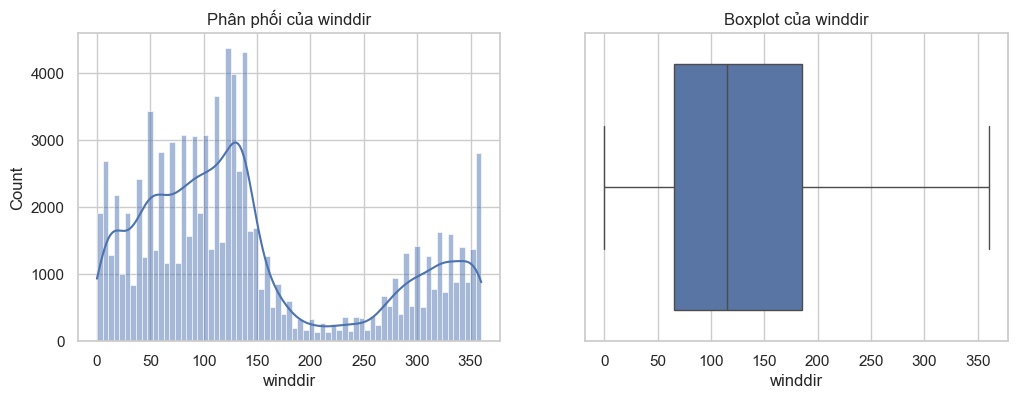

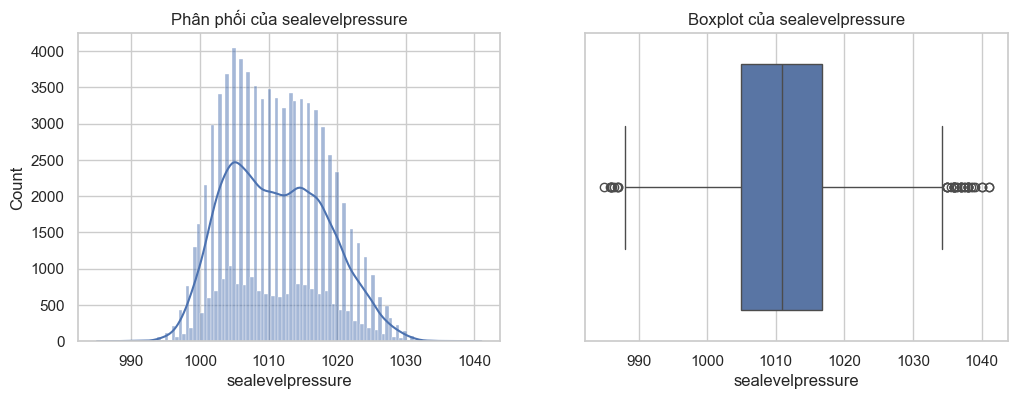

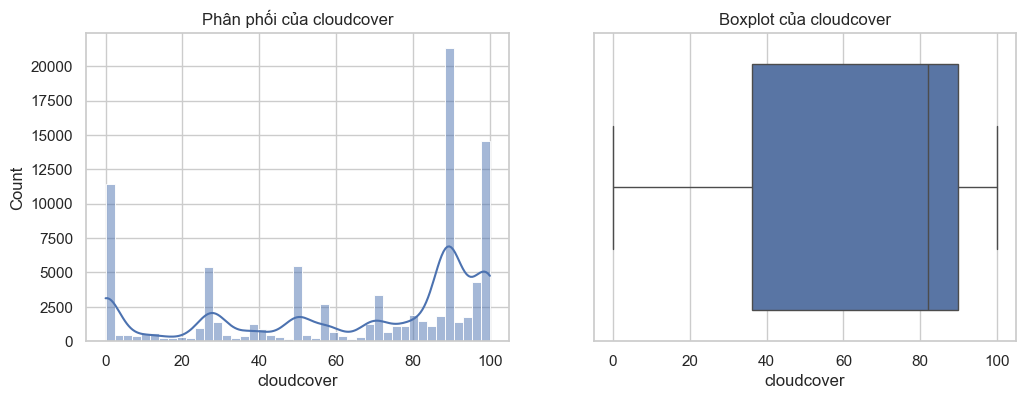

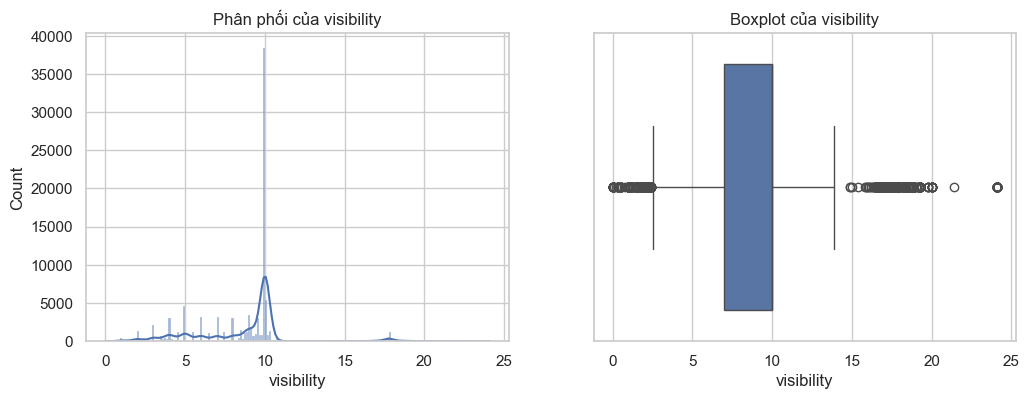

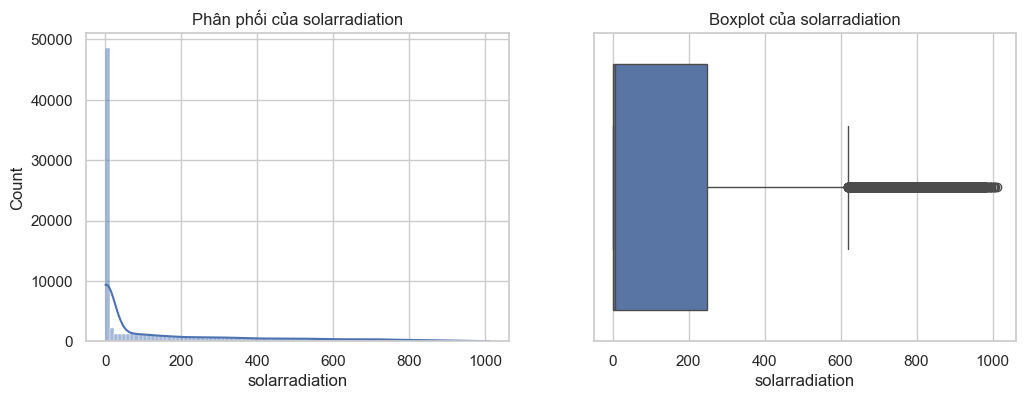

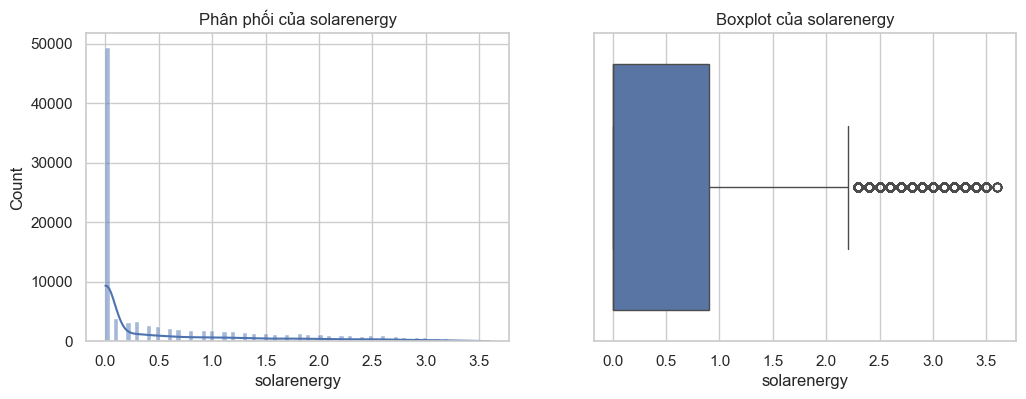

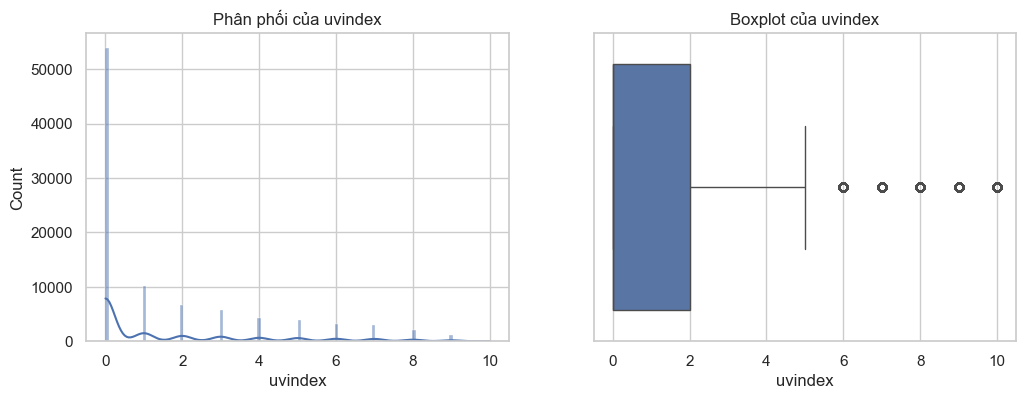

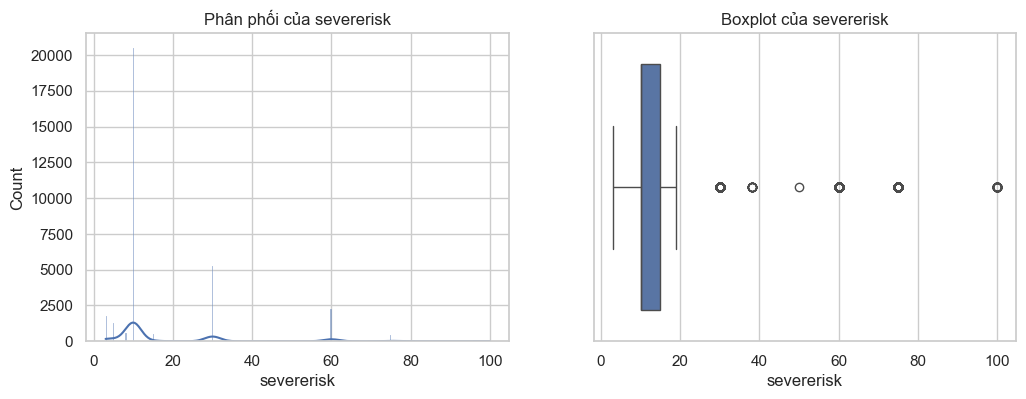

In [8]:

# Biểu đồ phân phối và boxplot
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(df_hourly[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Phân phối của {col}")
    sns.boxplot(x=df_hourly[col], ax=axes[1])
    axes[1].set_title(f"Boxplot của {col}")
    plt.show()


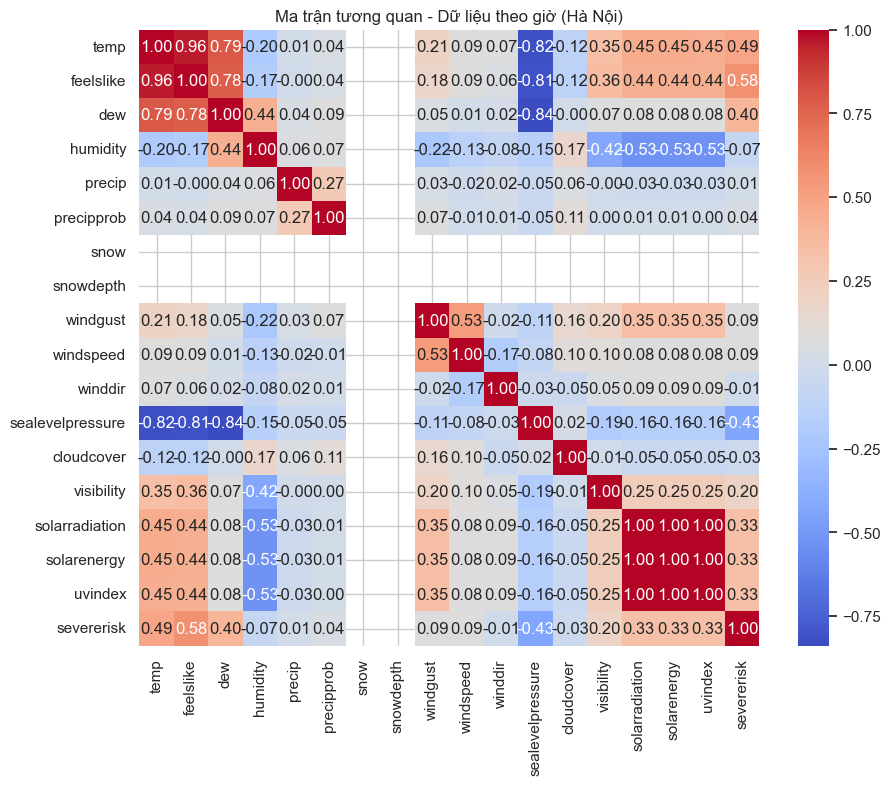

In [9]:

# Heatmap tương quan giữa các biến số
corr = df_hourly[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan - Dữ liệu theo giờ (Hà Nội)")
plt.show()



### ✳️ Nhận xét sơ bộ (theo giờ)
- Các cột numerical có thể chứa một số outliers (xem boxplot).  
- Một số cột có giá trị thiếu, cần xử lý trước khi đưa vào mô hình.  
- Heatmap cho thấy các biến nhiệt độ, độ ẩm, mưa, gió có mối tương quan nhất định.

---


## 📅 PHẦN 2 — PHÂN TÍCH DỮ LIỆU HÀ NỘI THEO NGÀY (`Hanoi-Daily.xls`)

In [17]:
path_daily = "/Users/user/Desktop/Hanoi Daily.csv"

# Đọc file CSV với mã hóa UTF-8-sig (phù hợp tiếng Việt)
df_daily = pd.read_csv(path_daily, encoding="utf-8-sig")

# Hiển thị thông tin cơ bản
print("Kích thước dữ liệu:", df_daily.shape)
display(df_daily.head())

Kích thước dữ liệu: (3927, 33)


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Hanoi,2015-01-01,24.0,11.4,17.7,24.0,11.4,17.7,9.4,63.8,0.0,0,0.0,NaN,0,0,25.2,13.0,78.3,1023.4,0.4,7.2,197.4,17.1,7,NaN,2015-01-01T06:33:34,2015-01-01T17:26:18,0.36,Clear,Clear conditions throughout the day.,clear-day,"48820099999,48823099999,48825099999,4883109999..."
1,Hanoi,2015-01-02,22.0,11.0,16.3,22.0,11.0,16.3,9.4,65.6,0.0,0,0.0,NaN,0,0,23.4,13.9,99.8,1022.7,28.3,7.7,187.6,16.2,7,NaN,2015-01-02T06:33:53,2015-01-02T17:26:56,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48820099999,48823099999,48825099999,4883109999..."
2,Hanoi,2015-01-03,21.0,13.1,17.0,21.0,13.1,17.0,12.4,75.6,0.0,0,0.0,NaN,0,0,21.6,13.0,97.0,1020.0,42.0,6.0,115.5,9.9,4,NaN,2015-01-03T06:34:11,2015-01-03T17:27:34,0.43,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48820099999,48823099999,48825099999,4883109999..."
3,Hanoi,2015-01-04,22.6,16.9,19.3,22.6,16.9,19.3,16.1,82.0,0.6,100,25.0,rain,0,0,25.2,17.2,98.7,1013.5,88.0,6.3,64.3,5.6,3,NaN,2015-01-04T06:34:28,2015-01-04T17:28:12,0.46,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48820099999,48823099999,48825099999,4883109999..."
4,Hanoi,2015-01-05,23.0,18.5,20.4,23.0,18.5,20.4,18.4,88.4,0.0,0,0.0,NaN,0,0,19.1,13.0,85.7,1011.2,90.6,4.2,93.7,7.9,4,NaN,2015-01-05T06:34:44,2015-01-05T17:28:51,0.50,Overcast,Cloudy skies throughout the day.,cloudy,"48820099999,48823099999,48825099999,4883109999..."


In [18]:

# Kiểm tra kiểu dữ liệu và thống kê mô tả
df_daily.info()
display(df_daily.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3927 non-null   object 
 1   datetime          3927 non-null   object 
 2   tempmax           3927 non-null   float64
 3   tempmin           3927 non-null   float64
 4   temp              3927 non-null   float64
 5   feelslikemax      3927 non-null   float64
 6   feelslikemin      3927 non-null   float64
 7   feelslike         3927 non-null   float64
 8   dew               3927 non-null   float64
 9   humidity          3927 non-null   float64
 10  precip            3927 non-null   float64
 11  precipprob        3927 non-null   int64  
 12  precipcover       3927 non-null   float64
 13  preciptype        2885 non-null   object 
 14  snow              3927 non-null   int64  
 15  snowdepth         3927 non-null   int64  
 16  windgust          3927 non-null   float64


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
count,3927,3927,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.00000,3927.000000,3927.000000,3927.000000,2885,3927.0,3927.0,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.00000,1361.000000,3927,3927,3927.000000,3927,3927,3927,3927
unique,1,3927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3927,3927,NaN,6,36,4,32
top,Hanoi,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01T06:33:34,2015-01-01T17:26:18,NaN,"Rain, Partially cloudy",Partly cloudy throughout the day.,rain,"48820099999,48823099999,48825099999,4883109999..."
freq,3927,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,2306,750,2834,3507
mean,NaN,NaN,28.515152,21.934963,24.898370,32.620550,22.703107,27.397021,20.488541,78.27344,5.226019,72.167049,8.221225,NaN,0.0,0.0,27.022587,17.394423,126.961268,1011.085358,63.828928,8.605602,155.118386,13.388719,5.84441,28.518736,NaN,NaN,0.483990,NaN,NaN,NaN,NaN
std,NaN,NaN,5.842098,4.870462,5.139137,9.530943,6.075115,7.734238,5.783574,10.76699,15.895322,44.823360,10.936552,NaN,0.0,0.0,8.080222,4.999515,97.746225,7.142712,23.636997,1.756703,77.239502,6.676342,2.47802,24.089535,NaN,NaN,0.288759,NaN,NaN,NaN,NaN
min,NaN,NaN,8.000000,5.900000,7.000000,8.000000,2.100000,4.600000,-2.000000,31.00000,0.000000,0.000000,0.000000,NaN,0.0,0.0,7.200000,6.500000,0.000000,991.100000,0.000000,2.400000,0.000000,0.000000,0.00000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,24.100000,18.000000,21.000000,24.100000,18.000000,21.000000,16.850000,72.20000,0.000000,0.000000,0.000000,NaN,0.0,0.0,21.600000,13.900000,61.900000,1005.200000,49.350000,7.700000,91.100000,7.800000,4.00000,10.000000,NaN,NaN,0.250000,NaN,NaN,NaN,NaN
50%,NaN,NaN,29.500000,23.000000,26.100000,32.700000,23.000000,27.100000,22.500000,79.80000,0.267000,100.000000,4.170000,NaN,0.0,0.0,25.900000,16.600000,109.300000,1010.700000,67.300000,9.000000,154.100000,13.300000,6.00000,10.000000,NaN,NaN,0.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,33.000000,26.000000,29.000000,41.300000,26.000000,33.900000,25.200000,85.80000,2.595000,100.000000,12.500000,NaN,0.0,0.0,31.000000,20.500000,131.900000,1016.500000,82.300000,9.800000,216.600000,18.700000,8.00000,60.000000,NaN,NaN,0.750000,NaN,NaN,NaN,NaN


In [19]:

# Kiểm tra missing values và duplicates
print("Số lượng giá trị thiếu:\n", df_daily.isnull().sum())
print("\nTỷ lệ thiếu (%):\n", (df_daily.isnull().mean() * 100).round(2))

dupes_daily = df_daily.duplicated().sum()
print(f"\nSố dòng trùng lặp: {dupes_daily}")


Số lượng giá trị thiếu:
 name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1042
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2566
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

Tỷ lệ thiếu (%):
 name                 0.00
datetime             0.00
tempmax              0.00
tempmin              0.00
temp          

In [20]:

# Phát hiện outliers bằng phương pháp IQR
numeric_cols_d = df_daily.select_dtypes(include=[np.number]).columns

Q1_d = df_daily[numeric_cols_d].quantile(0.25)
Q3_d = df_daily[numeric_cols_d].quantile(0.75)
IQR_d = Q3_d - Q1_d

outliers_d = ((df_daily[numeric_cols_d] < (Q1_d - 1.5 * IQR_d)) | 
              (df_daily[numeric_cols_d] > (Q3_d + 1.5 * IQR_d))).sum()

print("Số lượng outliers (theo từng cột):\n", outliers_d)


Số lượng outliers (theo từng cột):
 tempmax               3
tempmin               1
temp                  2
feelslikemax          0
feelslikemin         20
feelslike             0
dew                  41
humidity             91
precip              639
precipprob            0
precipcover         169
snow                  0
snowdepth             0
windgust            117
windspeed            59
winddir             664
sealevelpressure      1
cloudcover            0
visibility          119
solarradiation        0
solarenergy           0
uvindex               0
severerisk            0
moonphase             0
dtype: int64


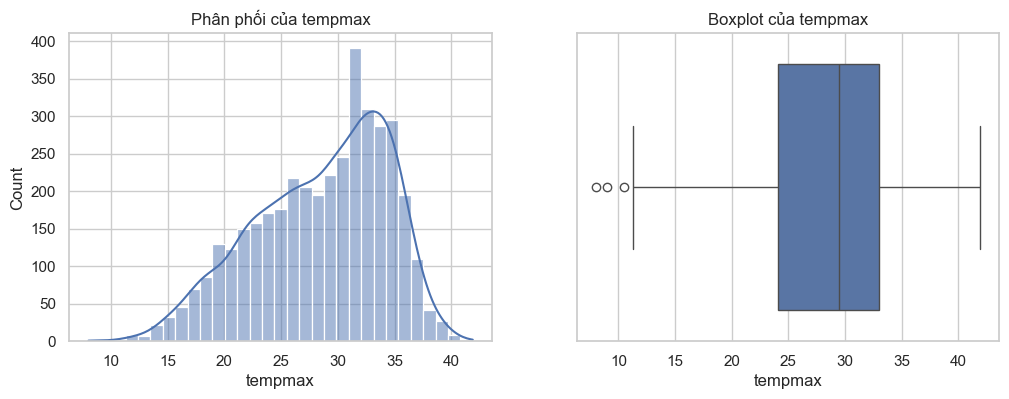

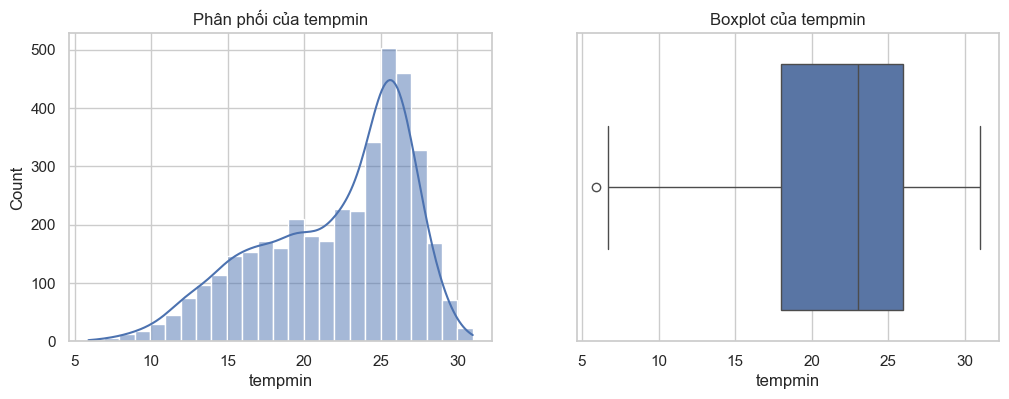

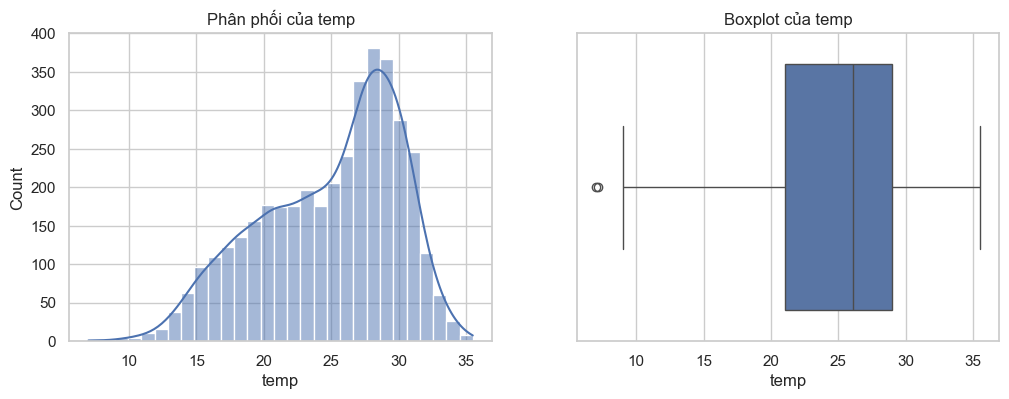

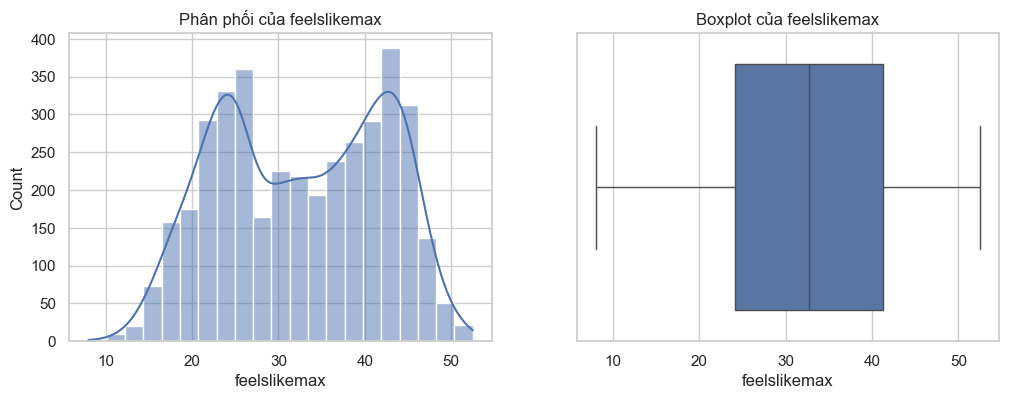

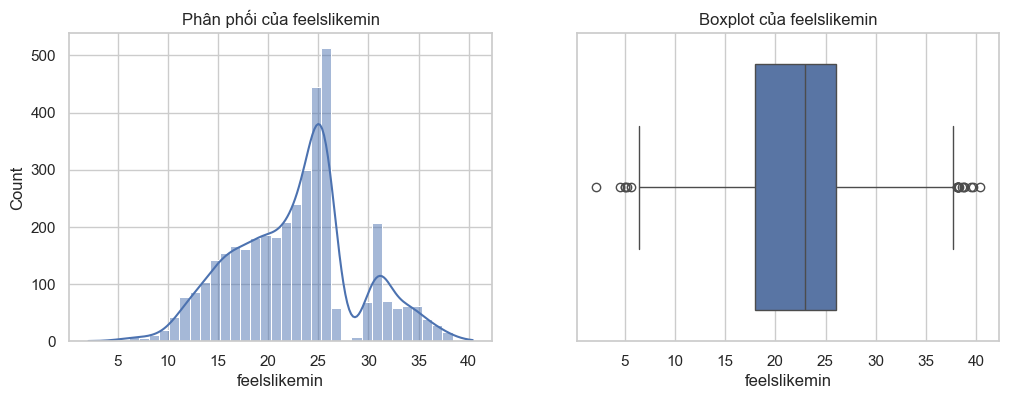

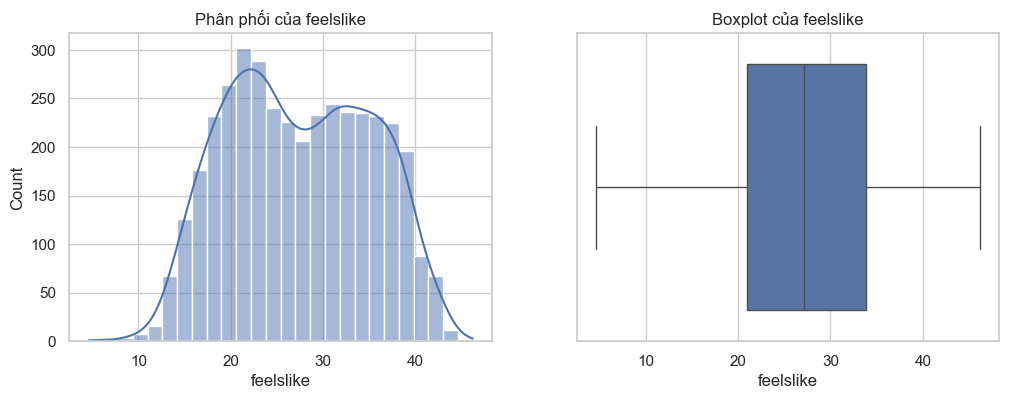

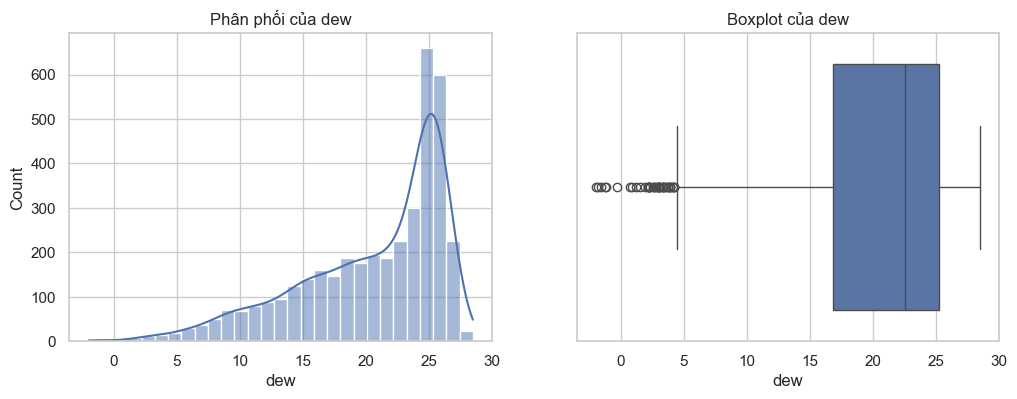

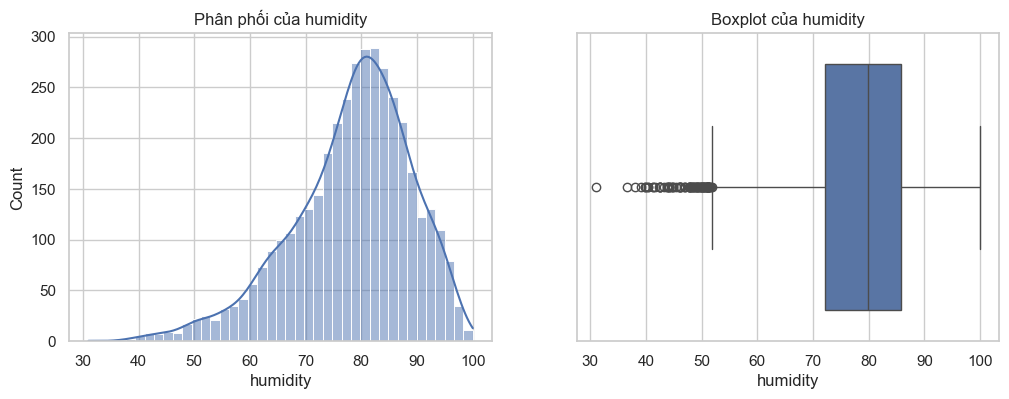

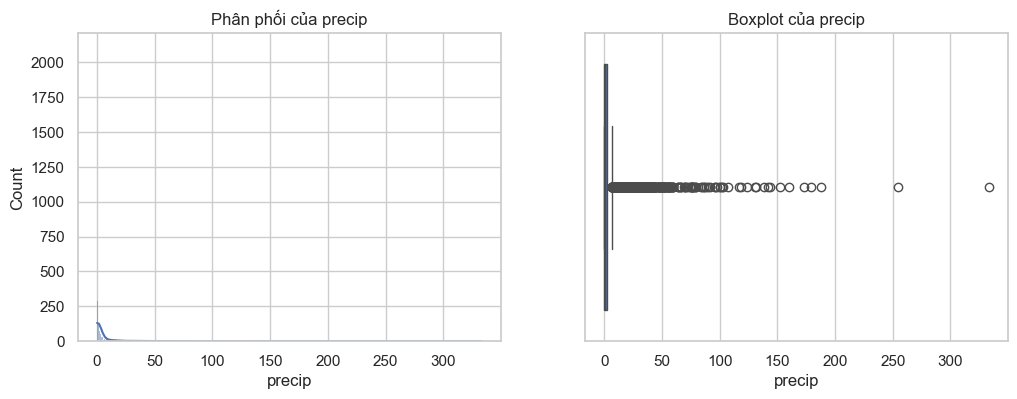

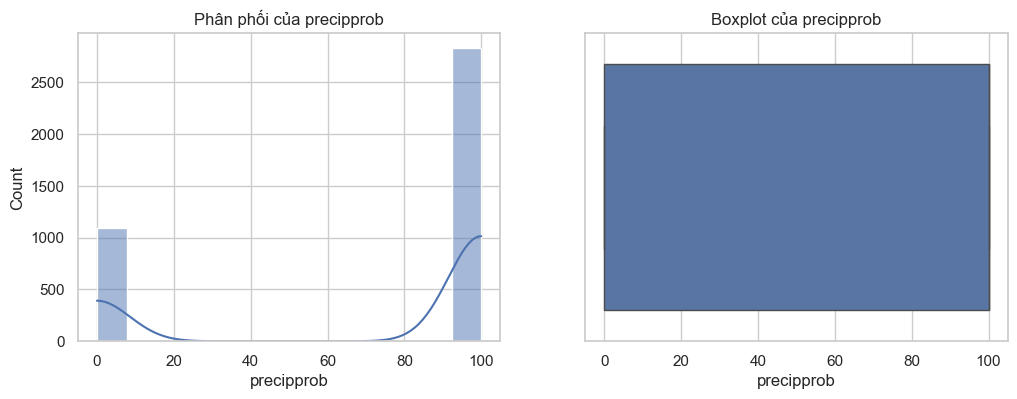

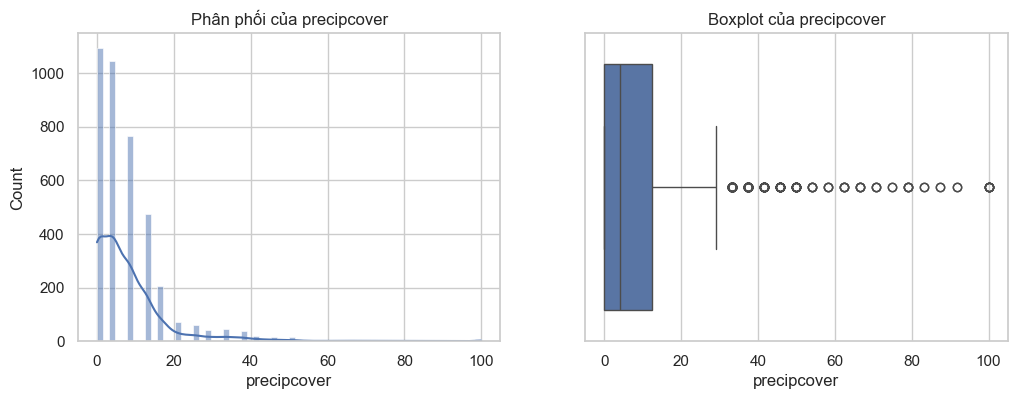

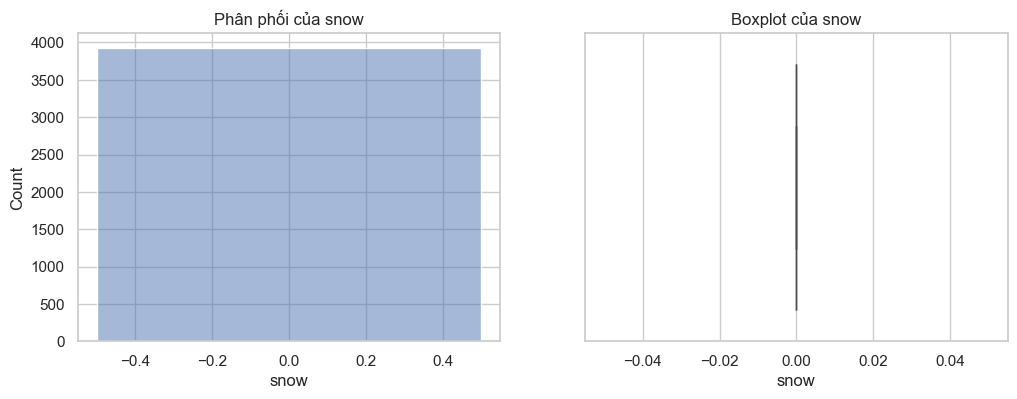

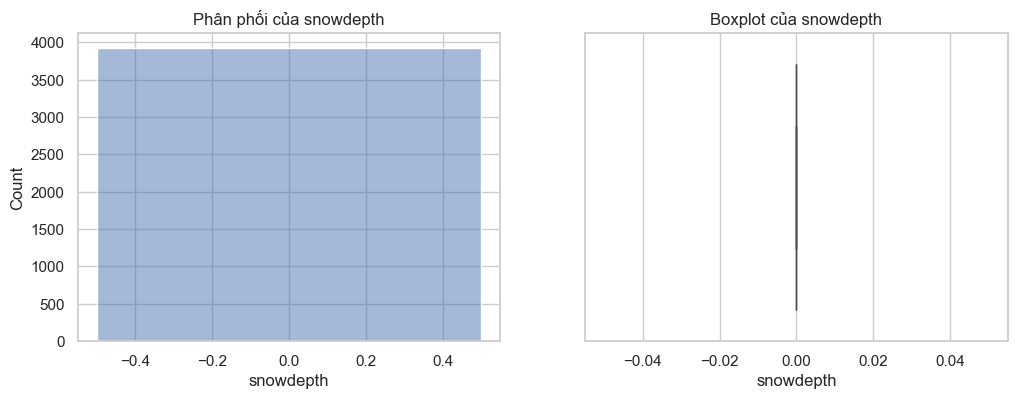

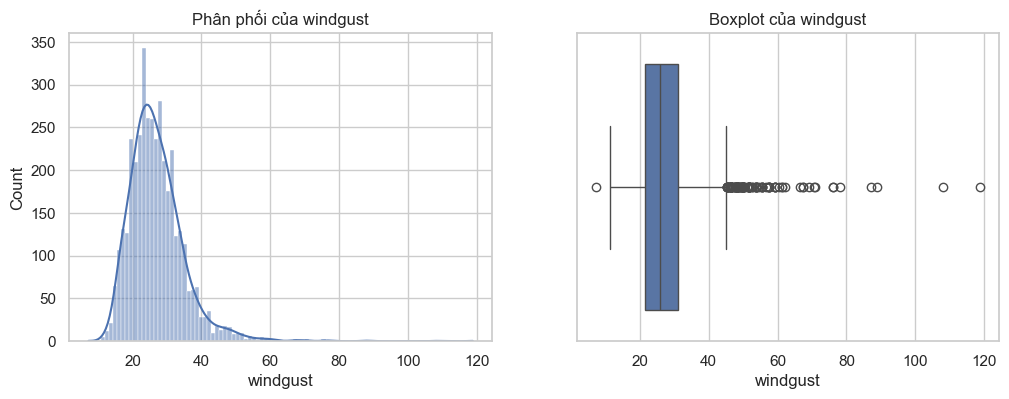

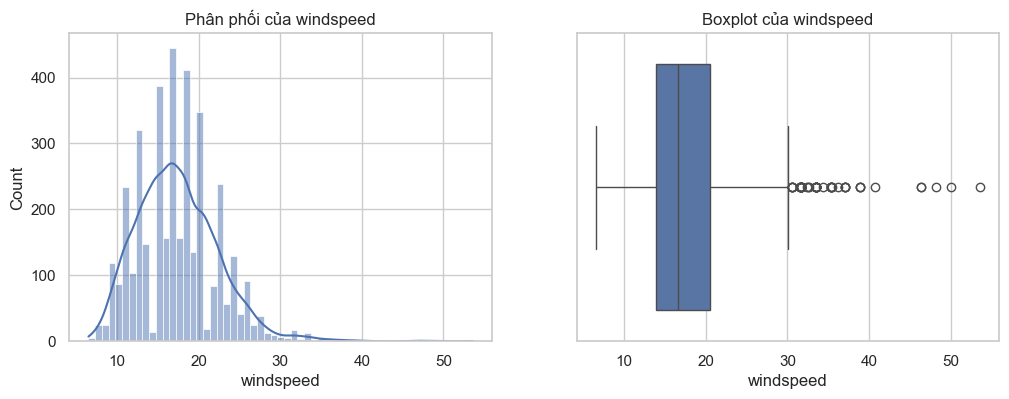

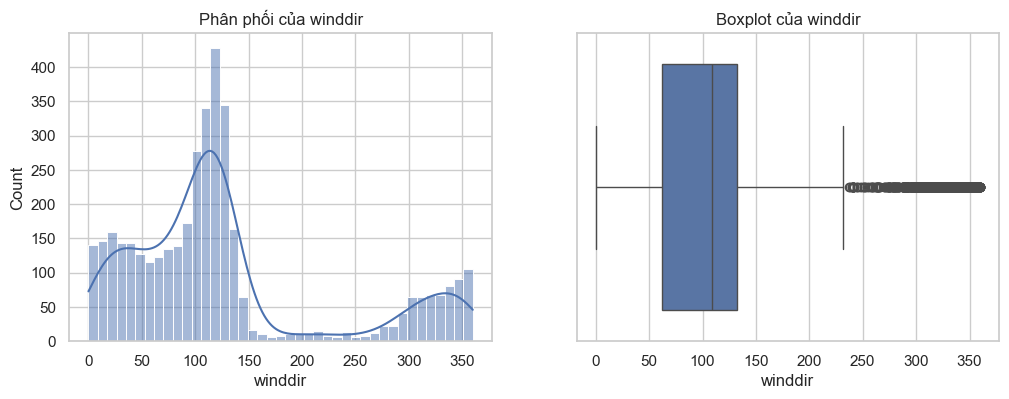

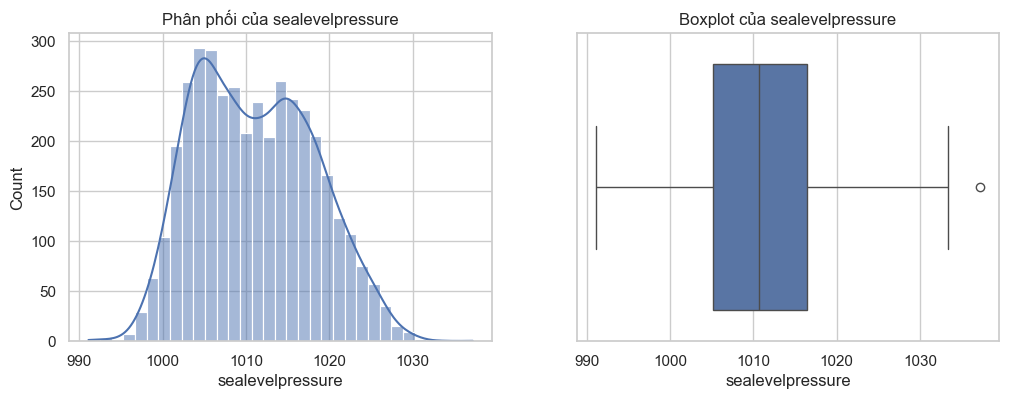

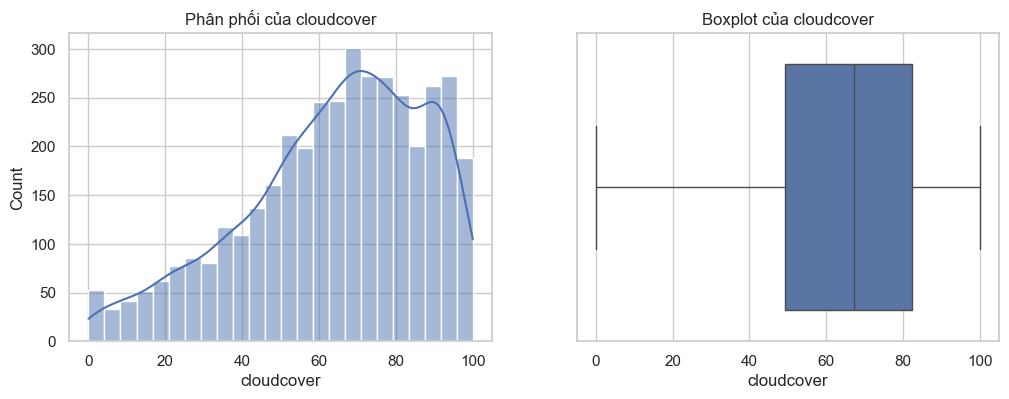

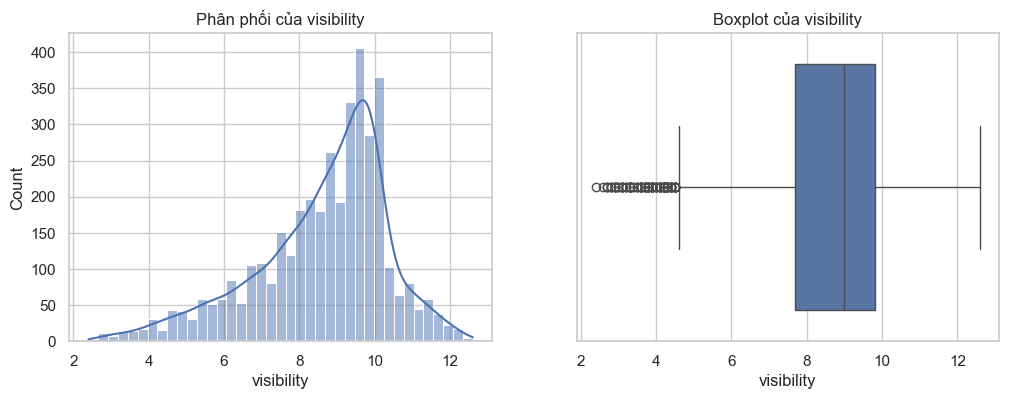

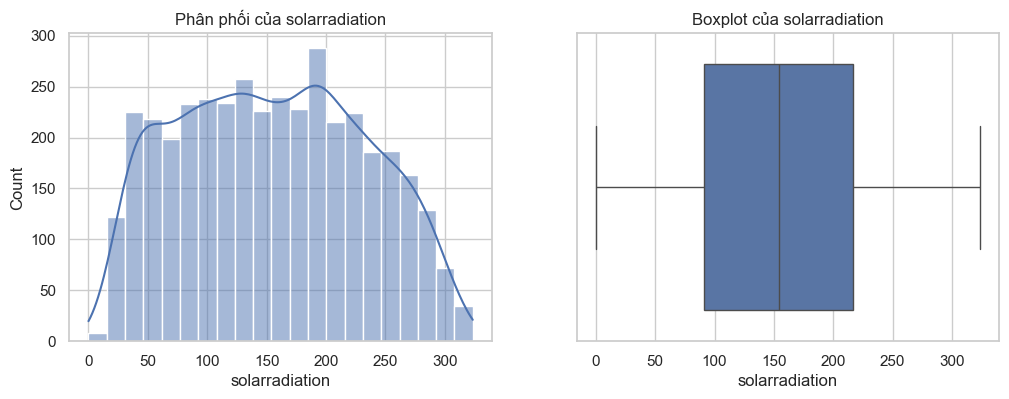

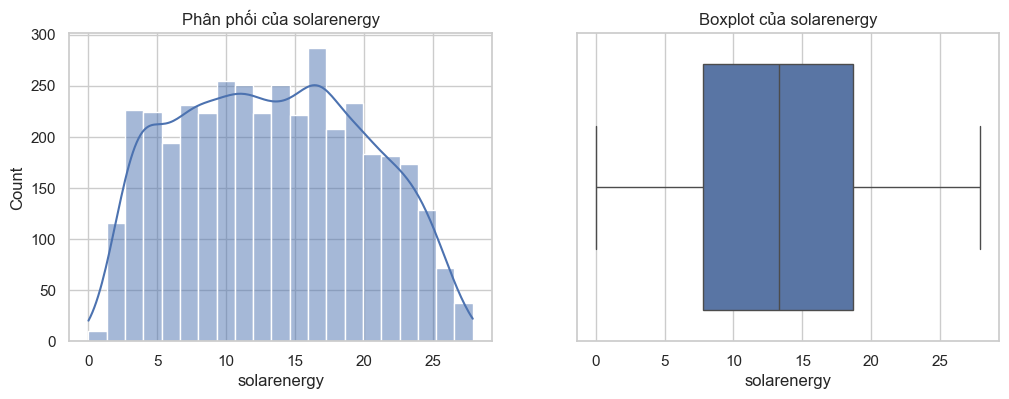

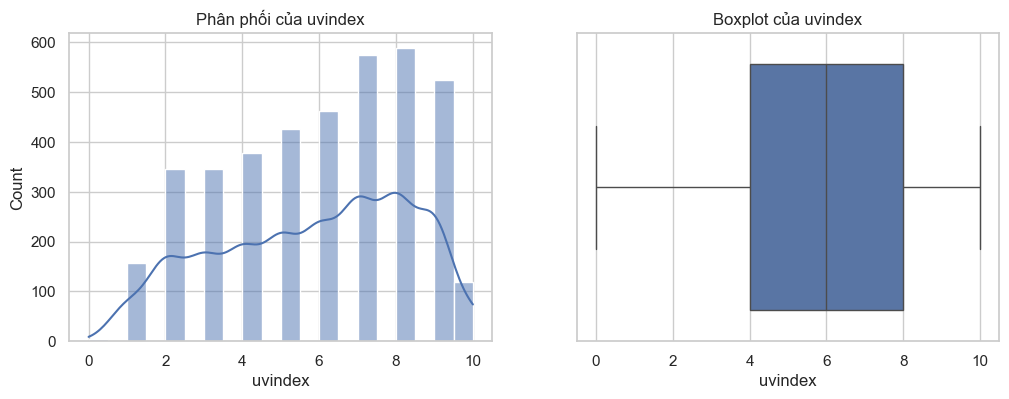

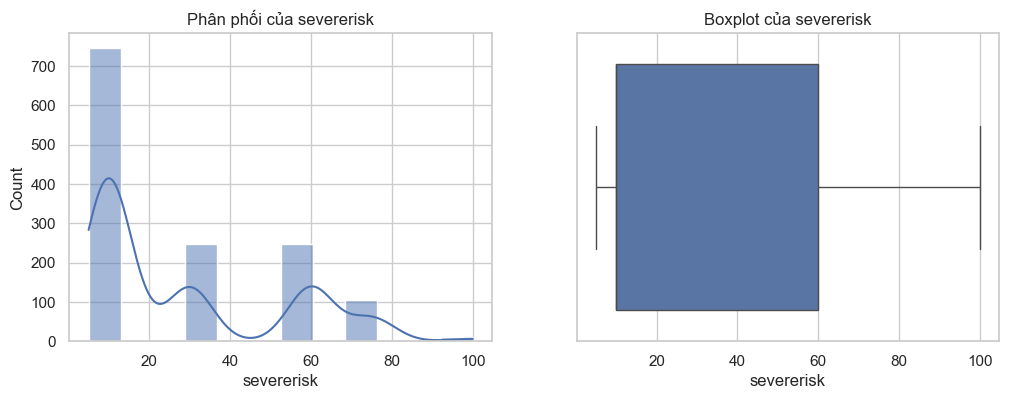

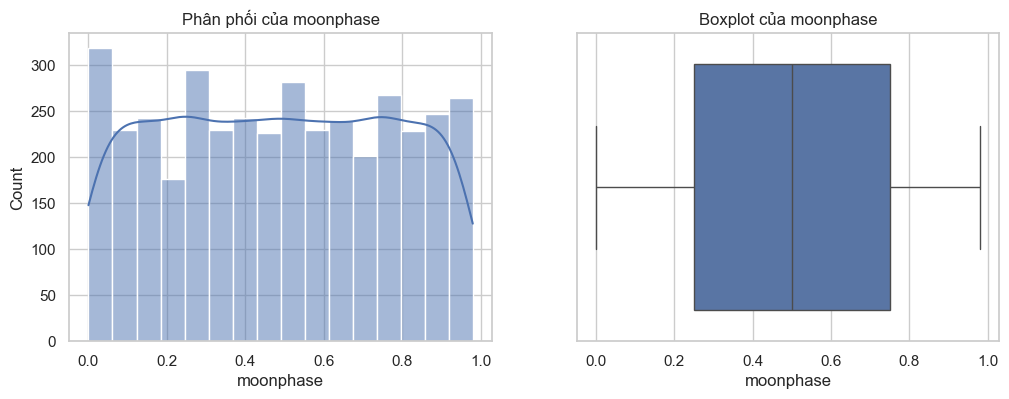

In [21]:

# Biểu đồ phân phối và boxplot
for col in numeric_cols_d:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(df_daily[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Phân phối của {col}")
    sns.boxplot(x=df_daily[col], ax=axes[1])
    axes[1].set_title(f"Boxplot của {col}")
    plt.show()


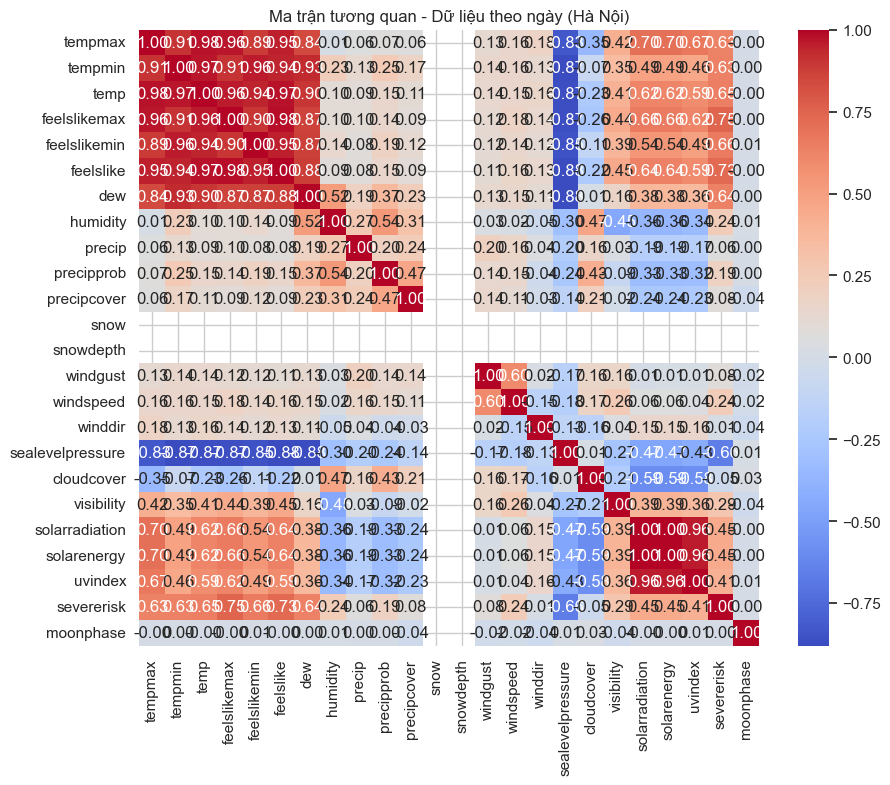

In [22]:

# Heatmap tương quan giữa các biến số
corr_d = df_daily[numeric_cols_d].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_d, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan - Dữ liệu theo ngày (Hà Nội)")
plt.show()



### ✳️ Nhận xét sơ bộ (theo ngày)
- Một số biến có phân phối lệch hoặc chứa outliers.  
- Tương quan giữa các biến thời tiết tương tự như dữ liệu theo giờ, nhưng ổn định hơn.  
- Cần chuẩn hóa dữ liệu và xử lý missing trước khi đưa vào mô hình ML.

---



## 🧩 PHẦN 3 — KẾT LUẬN CHUNG
**So sánh dữ liệu Hourly và Daily:**
- Cả hai đều có thể có missing, outliers, và sự khác biệt phân phối.  
- Dữ liệu theo giờ thường biến động mạnh hơn dữ liệu theo ngày.  
- Nên kiểm tra các cột thời gian (`datetime`) để tách thêm features như *month, hour, weekday* cho mô hình ML.

**Hướng xử lý tiếp theo:**
1. Xử lý missing (`fillna` hoặc `interpolate`)  
2. Loại bỏ hoặc winsorize outliers  
3. Chuẩn hóa dữ liệu (MinMaxScaler hoặc StandardScaler)  
4. Gộp thêm dữ liệu HCM để so sánh mô hình sau.

---
